<a href="https://colab.research.google.com/github/yamada2310/dataAnalysis100/blob/main/dataAnalysis100_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/100knock-data_analytics/6章')

In [23]:
import pandas as pd

factories = pd.read_csv("tbl_factory.csv",index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北
FC00006,山形工場,30,東北
FC00007,那須工場,25,東北
FC00008,青森工場,16,東北


In [24]:
warehouses = pd.read_csv("tbl_warehouse.csv",index_col=0)
warehouses

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北
WH00006,山形倉庫,65,東北


In [25]:
cost = pd.read_csv("rel_cost.csv",index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [26]:
trans=pd.read_csv("tbl_transaction.csv",index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [27]:
join_data = pd.merge(trans,cost,left_on=["ToFC","FromWH"],right_on=["FCID","WHID"],how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [28]:
join_data=pd.merge(join_data,factories,left_on="ToFC",right_on="FCID",how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [29]:
join_data = pd.merge(join_data,warehouses,left_on="FromWH",right_on="WHID",how="left")
join_data = join_data[["TransactionDate","Quantity","Cost","ToFC","FCName","FCDemand","FromWH","WHName","WHSupply","WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [30]:
kanto=join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [31]:
tohoku=join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


In [32]:
print("関東支社の総コスト："+str(kanto["Cost"].sum())+"万円")
print("東北支社の総コスト："+str(tohoku["Cost"].sum())+"万円")

関東支社の総コスト：2189.3万円
東北支社の総コスト：2062.0万円


In [33]:
print("関東支社の総部品輸送個数："+str(kanto["Quantity"].sum())+"個")
print("東北支社の総部品輸送個数："+str(tohoku["Quantity"].sum())+"個")

関東支社の総部品輸送個数：49146個
東北支社の総部品輸送個数：50214個


In [34]:
tmp = (kanto["Cost"].sum()/kanto["Quantity"].sum())*10000
print("関東支社の部品1つ当たりの輸送コスト："+str(int(tmp))+"円")
tmp=(tohoku["Cost"].sum()/tohoku["Quantity"].sum())*10000
print("東北支社の部品1つ当たりの輸送コスト："+str(int(tmp))+"円")

関東支社の部品1つ当たりの輸送コスト：445円
東北支社の部品1つ当たりの輸送コスト：410円


In [35]:
cost_chk = pd.merge(cost,factories,on="FCID",how="left")
print("東京支社の平均輸送コスト："+str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean())+"万円")
print("東北支社の平均輸送コスト："+str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean())+"万円")

東京支社の平均輸送コスト：1.075万円
東北支社の平均輸送コスト：1.05万円


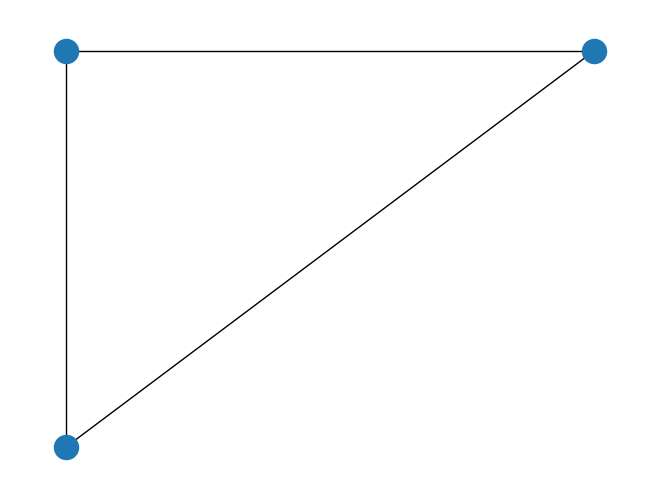

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")

pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

nx.draw(G,pos)

plt.show()

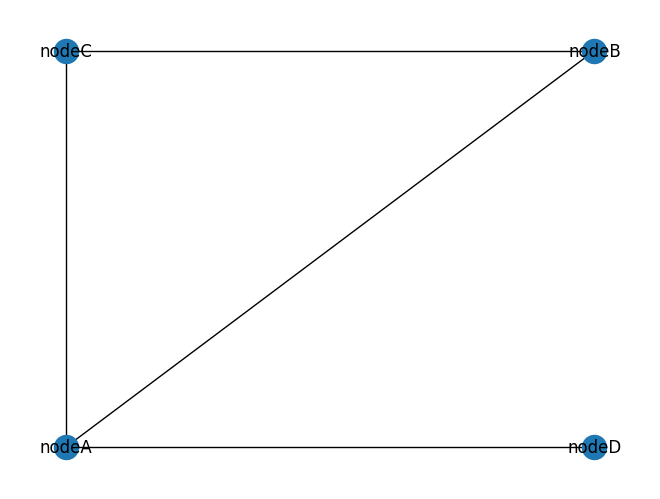

In [37]:
G.add_node("nodeD")
G.add_edge("nodeA","nodeD")
pos["nodeD"]=(1,0)
nx.draw(G,pos,with_labels=True)

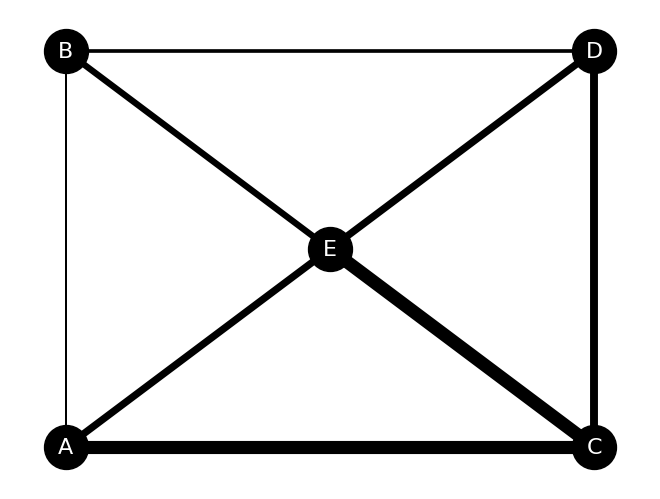

In [38]:
import numpy as np

df_w=pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

G = nx.Graph()

for i in range(len(df_w.columns)):
  G.add_node(df_w.columns[i])

size=10
edge_weights=[]
for i in range(len(df_w.columns)):
  for j in range(len(df_w.columns)):
    if not (i==j):
      G.add_edge(df_w.columns[i],df_w.columns[j])
      edge_weights.append(df_w.iloc[i][j]*size)

pos={}
for i in range(len(df_w.columns)):
  node=df_w.columns[i]
  pos[node]=(df_p[node][0],df_p[node][1])

nx.draw(G,pos,with_labels=True,font_size=16,node_size=1000,node_color='k',font_color='w',width=edge_weights)

plt.show()

In [39]:
df_tr=pd.read_csv('trans_route.csv',index_col="工場")
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


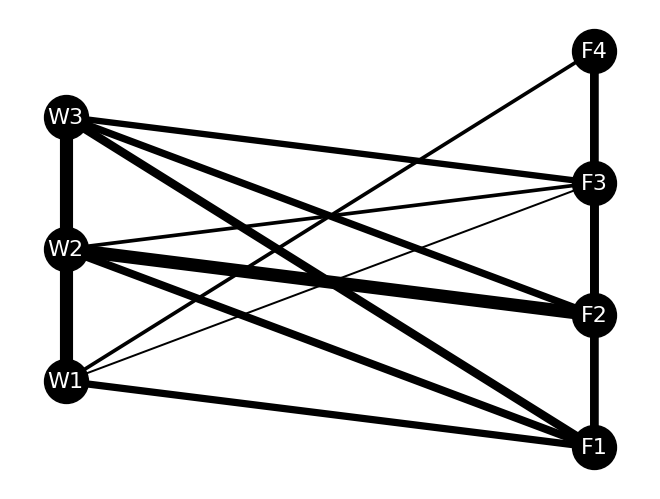

In [40]:
df_tr = pd.read_csv('trans_route.csv',index_col="工場")
df_pos=pd.read_csv('trans_route_pos.csv')

G = nx.Graph()

for i in range(len(df_pos.columns)):
  G.add_node(df_pos.columns[i])

num_pre=0
edge_wieghts=[]
size=0.1

for i in range(len(df_pos.columns)):
  for j in range(len(df_pos.columns)):
    if not (i==j):
      G.add_edge(df_pos.columns[i],df_pos.columns[j])
      if num_pre<len(G.edges):
        num_pre=len(G.edges)
        weight=0
        if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
          if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
            weight=df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
        elif(df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
          if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
            weight=df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
        edge_weights.append(weight)
pos = {}
for i in range(len(df_pos.columns)):
  node=df_pos.columns[i]
  pos[node]=(df_pos[node][0],df_pos[node][1])

nx.draw(G,pos,with_labels=True,font_size=16,node_size=1000,node_color='k',font_color='w',width=edge_weights)

plt.show()

In [43]:
df_tr = pd.read_csv('trans_route.csv',index_col="工場")
df_tc = pd.read_csv('trans_cost.csv',index_col='工場')

def trans_cost(df_tr,df_tc):
  cost=0
  for i in range(len(df_tc.index)):
    for j in range(len(df_tr.columns)):
      cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
  return cost

print("総輸送コスト："+str(trans_cost(df_tr,df_tc)))

総輸送コスト：1493
